In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss
from sklearn.random_projection import GaussianRandomProjection
import seaborn as sns

In [15]:
%matplotlib inline
plt.style.use('seaborn')

In [16]:
cd D:\STUDY\SEM-4\ML\Assignment-1

D:\STUDY\SEM-4\ML\Assignment-1


In [59]:
data = pd.read_csv('student-mat.csv',sep = ';')
df = data
ydata_pca = data['G3']>11.0
ydata = (data['G3']>11.0).astype(int)
y_df = pd.DataFrame(ydata)
data = data.drop(['G1','G2','G3'], axis = 1)
#data.dtypes
obj_df = data.select_dtypes(include=['object']).copy()
#df_3 = pd.get_dummies(obj_df,columns=['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'],drop_first = True)
#data = data.drop(['school','sex', 'address','famsize','Pstatus','dep','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'], axis=1)
df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
df_5 = data.drop(obj_df.columns, axis = 1)
xdata = pd.concat([df_5,df_4],axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split( xdata , ydata , test_size=0.33, random_state=42)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix  

In [21]:
def featurebuild(data,n):
    df = []
    if n < data.shape[1]:
        df = data.iloc[:,:n+1]
    elif (n >= data.shape[1]):
        df = data
    if len(df.dtypes[df.dtypes == 'object']) != 0:
        obj_df = df.select_dtypes(include=['object']).copy()
        df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
        df_5 = df.drop(obj_df.columns, axis = 1)
        df_6 = pd.concat([df_5,df_4],axis = 1)
        return df_6
    else:
        return df

In [22]:
import warnings
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
transform_list = data.dtypes[data.dtypes != 'object'].index
scaler.fit(X_train[transform_list])
warnings.filterwarnings("ignore")
X_train[transform_list]= scaler.transform(X_train[transform_list])  
X_test[transform_list]= scaler.transform(X_test[transform_list])

In [23]:
xdata = pd.concat([X_train,X_test],axis = 0)

In [24]:
X_train, X_test, y_train, y_test = train_test_split( xdata , ydata , test_size=0.33, random_state=42)

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(xdata)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [27]:
y_pred = kmeans.labels_ 

In [28]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

Error rate vs number of clusters KMeans Learning curve

In [29]:
from scipy.spatial.distance import cdist

In [31]:
error = []
error_train = []

# Calculating error for K values between 1 and 40
for i in range(2, 10):   
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(xdata, ydata)
    error.append(np.average(np.min(cdist(xdata, kmeans.cluster_centers_, 'euclidean'), axis=1)))

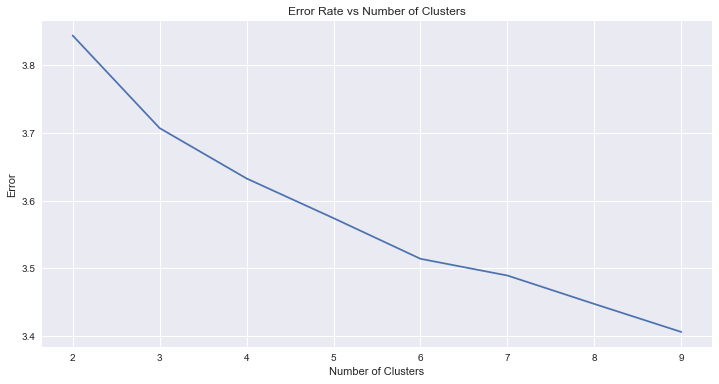

In [32]:
plt.figure(figsize=(12, 6))  
plt.plot(range(2,10), error)
plt.title('elbow curve')
plt.title('Error Rate vs Number of Clusters')  
plt.xlabel('Number of Clusters')  
plt.ylabel('Error') 
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 6)

In [35]:
xdata.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

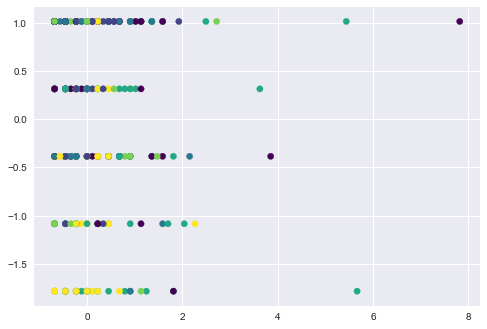

In [43]:
labels = kmeans.fit(xdata).predict(xdata)
plt.scatter(xdata['absences'], xdata['health'], c=labels, s=40, cmap='viridis')
plt.show()

EM Algorithm 

In [44]:
from matplotlib import style
style.use('fivethirtyeight')
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
import sklearn.mixture as mix

In [47]:
xdata.shape

(395, 39)

In [48]:
GMM = GaussianMixture(n_components=5).fit(xdata.iloc[:200,:]) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_
# Predict
prediction = GMM.predict_proba(xdata.iloc[200:,:])
print(prediction)

Converged: True
[[0.00000000e+000 1.00000000e+000 2.09285578e-245 0.00000000e+000
  0.00000000e+000]
 [1.04338601e-059 1.00000000e+000 1.45428382e-087 0.00000000e+000
  0.00000000e+000]
 [1.25897116e-014 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [1.16070925e-150 1.00000000e+000 1.86055450e-057 0.00000000e+000
  0.00000000e+000]
 [2.72954225e-140 1.00000000e+000 1.44440114e-073 0.00000000e+000
  0.00000000e+000]
 [1.77445800e-002 9.82255420e-001 2.71430466e-195 0.00000000e+000
  0.00000000e+000]
 [1.01082643e-009 9.99999999e-001 3.75441840e-031 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [6.78995058e-054 1.00000000e+000 3.66412295e-024 0.00000000e+000
  0.00000000e+000]
 [1.69840196e-051 1.00000000e+000 1.48780298e-294 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 1.43758934e-202 0.00000000e+000
  0.00000000e+000]
 [4.97574698e-242 1.00000000e+000 3.53831513e-123

In [49]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [50]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[-0.38028189  0.92861371  0.73690398  0.02881096  0.06500461 -0.35424824
  -0.15584529  0.00950106 -0.02030392 -0.14377519 -0.25248247 -0.0505745
  -0.06910077  0.07823467  0.50464307  0.7913712   0.26980613  0.84754533
   0.24774668  0.10418409  0.13954382  0.46940807  0.13039113  0.33513051
   0.22153965  0.2998996   0.26980668  0.1564688   0.23470758  0.76529597
   0.01303911  0.14011223  0.7392142   0.53403522  0.54432827  0.90872621
   1.          0.88264854  0.32598137]
 [ 0.08525202 -0.35554174 -0.33643477  0.09061981 -0.0583769   0.10121318
   0.03901981  0.00659144 -0.10987818 -0.01822189 -0.07742719  0.02070752
  -0.0255797   0.14414787  0.42869439  0.74907716  0.23655166  0.91827406
   0.02135379  0.44317395  0.31658106  0.          0.          0.64758726
   0.2776694   0.          0.27926191  0.07474356  0.26160023  0.65297737
   0.112115    0.13482879  0.54620262  0.43801514  0.47651117  0.73839832
   0.93593428  0.80780262  0.33100475]]


[[[ 6.84890754e-01  3.11808743e-

Selecting number of components in EM algorithm

In [151]:
box = []
for i in range(2,20):
    gmm = GaussianMixture(n_components=i)
    gmm = gmm.fit(xdata)
    box.append(gmm.bic(xdata))

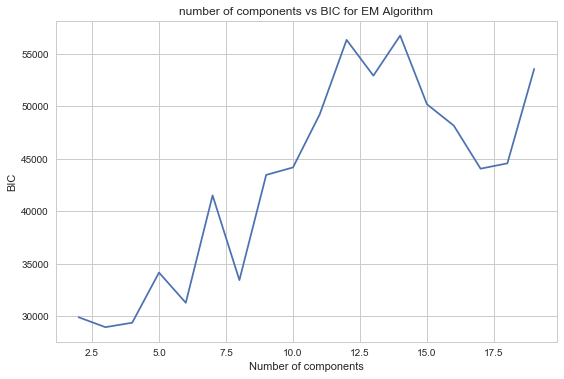

In [152]:
plt.plot(range(2,20),box)
plt.title('number of components vs BIC for EM Algorithm')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.show()

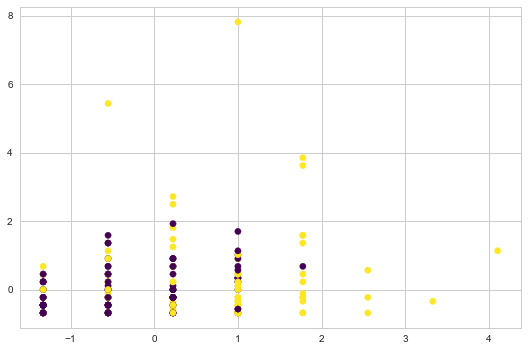

In [143]:
from sklearn.mixture import GMM
gmm = GMM(n_components=2).fit(X_train)
labels = gmm.predict(X_train)
plt.scatter(X_train[''], X_train['absences'], c=labels, s=40, cmap='viridis')


In [52]:
probs = gmm.predict_proba(X_train)
print(probs[:5])

[[7.43297182e-008 9.99999926e-001]
 [1.92373385e-005 9.99980763e-001]
 [1.00000000e+000 1.75403754e-263]
 [1.00000000e+000 2.96595589e-216]
 [1.00000000e+000 0.00000000e+000]]


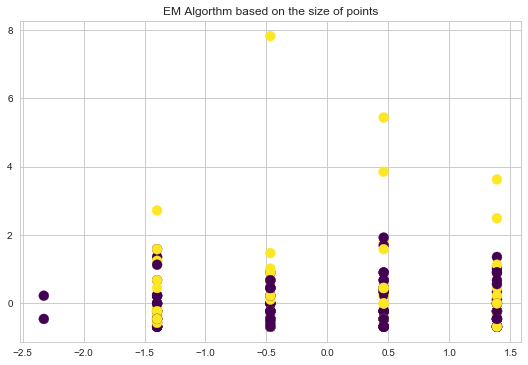

In [145]:
size =  100*probs.max(1)  # square emphasizes differences
plt.scatter(X_train['Fedu'], X_train['absences'], c=labels, cmap='viridis', s=size)
plt.title('EM Algorthm based on the size of points')
plt.show()

PCA

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(xdata)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [67]:
print(pca.explained_variance_)

[64.18776799  2.79092277]


In [68]:
principalDf['target'] = ydata_pca.values

In [70]:
principalDf.head(15)

,principal component 1,principal component 2,target
0,0.316776,-1.015964,False
1,-1.772374,-0.583529,False
2,4.242943,0.403875,False
3,-3.773828,-2.279653,True
4,-1.750555,-0.932662,False
5,4.243904,-1.050611,True
6,-5.767293,-0.394812,False
7,0.323428,-2.193472,False
8,-5.764438,-2.579407,True
9,-5.819110,-1.831998,True


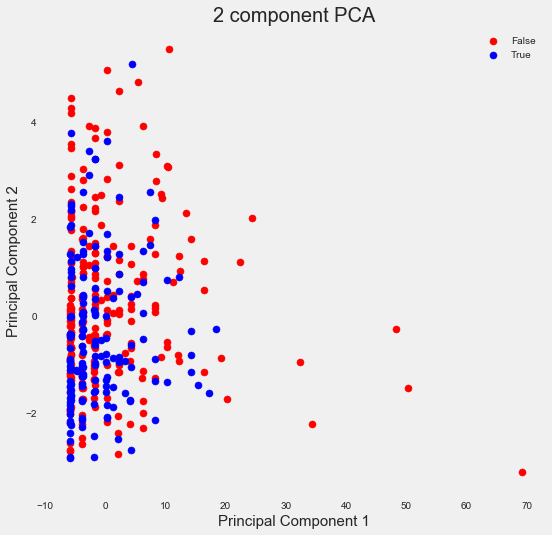

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [False, True]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [76]:
pca = PCA(n_components=2)
pca.fit_transform(xdata)
print (pca.explained_variance_ratio_)

[0.78817422 0.03427029]


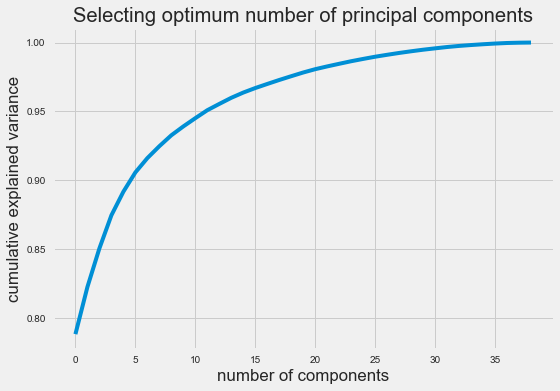

In [77]:
pca = PCA().fit(xdata)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Selecting optimum number of principal components')
plt.show()

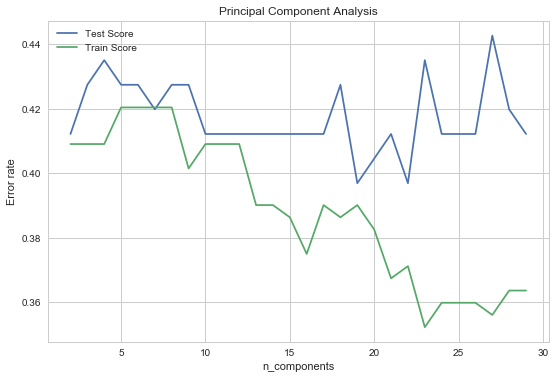

In [79]:
n_components = range(2,30,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    pca = PCA(n_components = n_components[i], random_state=7)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_pca, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_pca)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_pca)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')
plt.title('Principal Component Analysis')
plt.legend(['Test Score', 'Train Score'])

In [81]:
from sklearn.metrics import zero_one_loss
from sklearn.random_projection import GaussianRandomProjection
import seaborn as sns

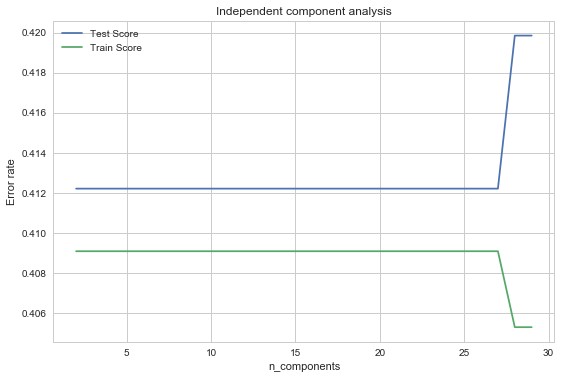

In [87]:
n_components = range(2,30,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    ica = FastICA(n_components = n_components[i], random_state=7)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ica, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ica)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ica)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')
plt.title('Independent component analysis')
plt.legend(['Test Score', 'Train Score'])

In [88]:
ra = GaussianRandomProjection(n_components = 8, random_state = 7)

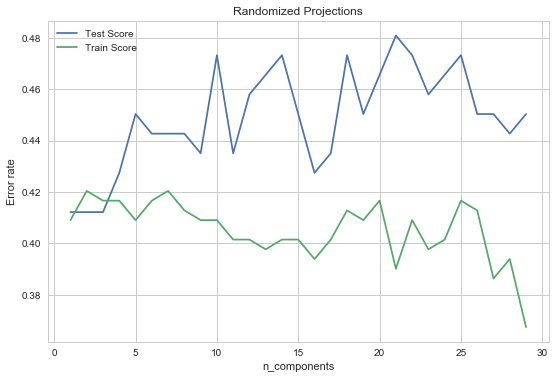

In [89]:
n_components = range(1,30,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    ra = GaussianRandomProjection(n_components = n_components[i], random_state=7)
    X_train_ra = ra.fit_transform(X_train)
    X_test_ra = ra.transform(X_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ra, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ra)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ra)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')
plt.title('Randomized Projections')
plt.legend(['Test Score', 'Train Score'])

In [90]:
from sklearn.decomposition import FastICA, PCA

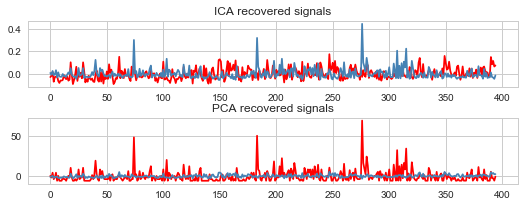

In [93]:
ica = FastICA(n_components=2)
S_ = ica.fit_transform(xdata)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


# For comparison, compute PCA
pca = PCA(n_components=2)
H = pca.fit_transform(xdata)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [ S_, H]
names = ['ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

Clustering after PCA

In [95]:
pca = PCA(n_components=22)
pca_results = pca.fit_transform(xdata)

In [96]:
kmeans = KMeans(n_clusters = 5)

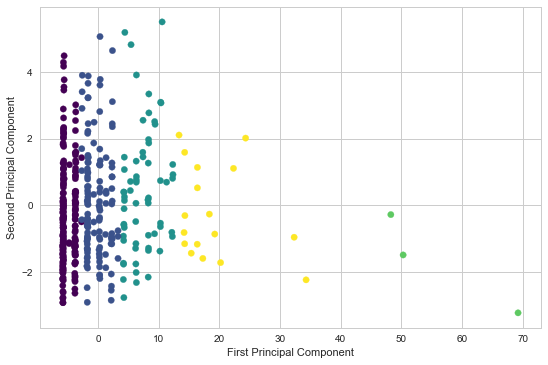

In [97]:
labels = kmeans.fit(pca_results).predict(pca_results)
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Clustering after ICA

In [99]:
ica = FastICA(n_components=6)
ica_results = ica.fit_transform(xdata)

In [100]:
kmeans = KMeans(n_clusters = 5)

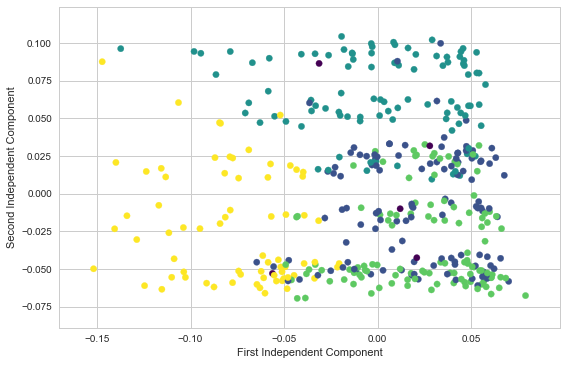

In [101]:
labels = kmeans.fit(ica_results).predict(ica_results)
plt.scatter(ica_results[:, 0], ica_results[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.show()

Clustering after RA

In [102]:
ra = GaussianRandomProjection(n_components = 17, random_state = 7)
ra_results = ra.fit_transform(xdata)

In [103]:
kmeans = KMeans(n_clusters = 5)

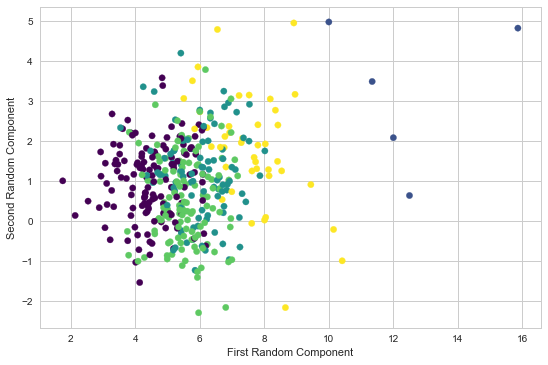

In [104]:
labels = kmeans.fit(ra_results).predict(ra_results)
plt.scatter(ra_results[:, 0], ra_results[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('First Random Component')
plt.ylabel('Second Random Component')
plt.show()

EM after PCA

In [148]:
pca = PCA(n_components=22)
pca_results = pca.fit_transform(xdata)

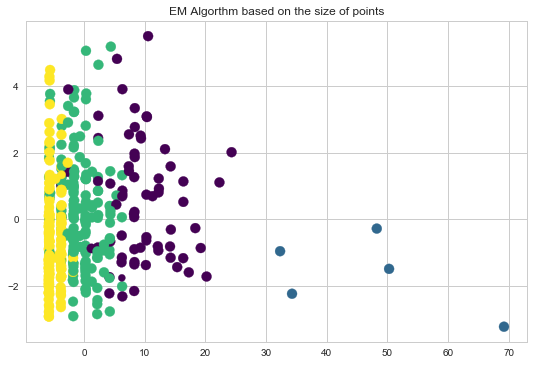

In [154]:
gmm = GaussianMixture(n_components=4).fit(pca_results)
labels = gmm.predict(pca_results)
probs = gmm.predict_proba(pca_results)
size =  100*probs.max(1)  # square emphasizes differences
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=labels, cmap='viridis', s=size)
plt.title('EM Algorthm based on the size of points')
plt.show()

EM after ICA

In [156]:
ica = FastICA(n_components=6)
ica_results = ica.fit_transform(xdata)

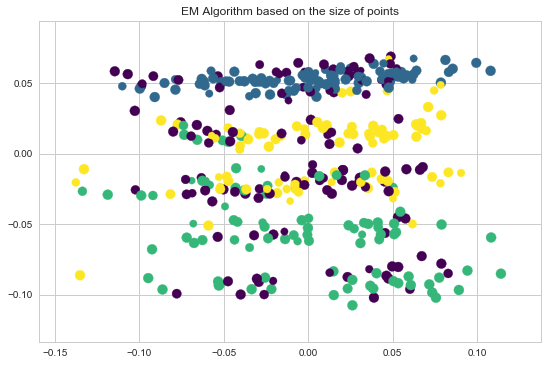

In [157]:
gmm = GaussianMixture(n_components=4).fit(ica_results)
labels = gmm.predict(ica_results)
probs = gmm.predict_proba(ica_results)
size =  100*probs.max(1)  # square emphasizes differences
plt.scatter(ica_results[:, 0], ica_results[:, 1], c=labels, cmap='viridis', s=size)
plt.title('EM Algorithm based on the size of points')
plt.show()

EM after RA

In [159]:
ra = GaussianRandomProjection(n_components = 17, random_state = 7)
ra_results = ra.fit_transform(xdata)

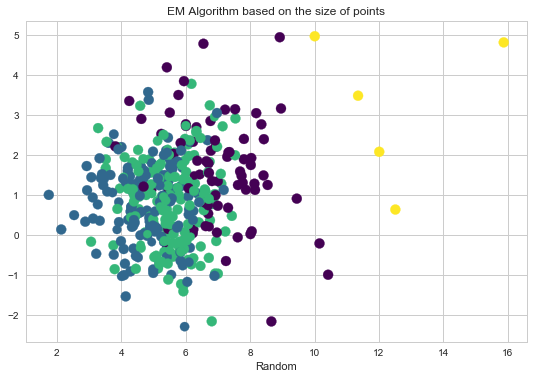

In [160]:
gmm = GaussianMixture(n_components=4).fit(ra_results)
labels = gmm.predict(ra_results)
probs = gmm.predict_proba(ra_results)
size =  100*probs.max(1)  # square emphasizes differences
plt.scatter(ra_results[:, 0], ra_results[:, 1], c=labels, cmap='viridis', s=size)
plt.title('EM Algorithm based on the size of points')
plt.xlabel('Random')
plt.ylabel('')
plt.show()

Neural Networks after PCA

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV

In [106]:
pca = PCA(n_components = 6, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [107]:
xdata_ann_pca = np.concatenate([X_train_pca,X_test_pca])

In [109]:
xdata_ann_pca = pd.DataFrame(xdata_ann_pca,columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])

In [110]:
set_values = [15,15,15,15,15,15]
store = np.zeros((6,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1],max_iter=500)
    model_ann = mlp.fit(X_train_pca,y_train)
    predictions = model_ann.predict(X_test_pca)
    predictions_train = model_ann.predict(X_train_pca)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)


Text(0.5,1,'Accuracy vs number of hidden layers')

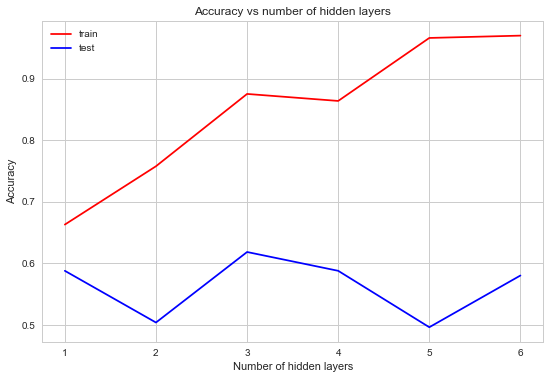

In [111]:
plt.plot(range(1,7),store[:,0], c = 'r')
plt.plot(range(1,7),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')

Neural Networks with Original Data

In [ ]:
from sklearn.metrics import accuracy_score

In [112]:
set_values = [15,15,15,15,15,15]
store = np.zeros((6,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1],max_iter=500)
    model_ann = mlp.fit(X_train,y_train)
    predictions = model_ann.predict(X_test)
    predictions_train = model_ann.predict(X_train)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)

Text(0.5,1,'Accuracy vs number of hidden layers')

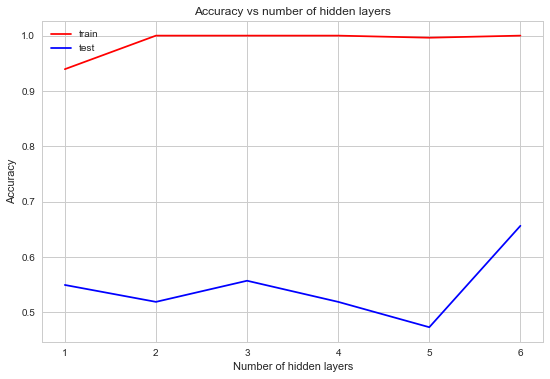

In [113]:
plt.plot(range(1,7),store[:,0], c = 'r')
plt.plot(range(1,7),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')

 Neural Networks after Clustering

In [135]:
kmeans_train = KMeans(n_clusters=6, random_state=0).fit(X_train)
kmeans_test = KMeans(n_clusters=6, random_state=0).fit(X_test)

In [136]:
feature_train = kmeans_train.labels_ 
feature_test = kmeans_test.labels_ 

In [137]:
feature_train = feature_train.reshape(-1,1)
feature_test = feature_test.reshape(-1,1)

In [138]:
set_values = [10,5,3,2]
store = np.zeros((4,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1])
    model_ann = mlp.fit(feature_train,y_train)
    predictions = model_ann.predict(feature_test)
    predictions_train = model_ann.predict(feature_train)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)

Text(0.5,1,'Accuracy vs number of hidden layers')

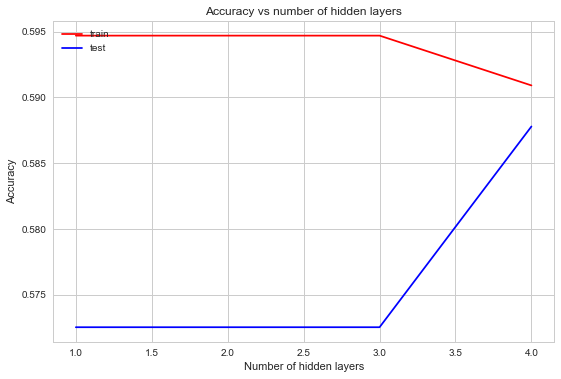

In [139]:
plt.plot(range(1,5),store[:,0], c = 'r')
plt.plot(range(1,5),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')

Neural networks after EM

In [161]:
em_train = GaussianMixture(n_components=4).fit(X_train)
em_test = GaussianMixture(n_components=4).fit(X_test)

In [162]:
feature_em_train =em_train.predict(X_train)
feature_em_test = em_test.predict(X_test) 


In [163]:
feature_em_train = feature_em_train.reshape(-1,1)
feature_em_test = feature_em_test.reshape(-1,1)

In [170]:
set_values = [7,6,5,2]
store = np.zeros((4,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1])
    model_ann = mlp.fit(feature_em_train,y_train)
    predictions = model_ann.predict(feature_em_test)
    predictions_train = model_ann.predict(feature_em_train)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)

Text(0.5,1,'Accuracy vs number of hidden layers')

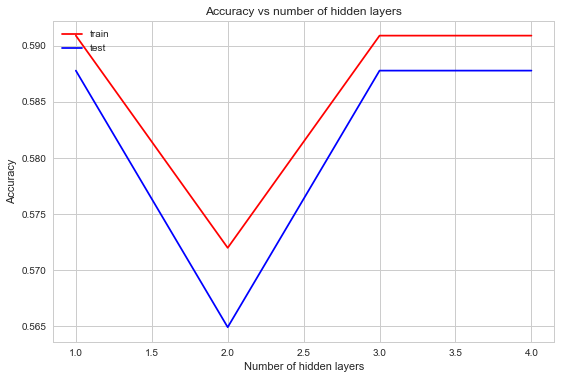

In [171]:
plt.plot(range(1,5),store[:,0], c = 'r')
plt.plot(range(1,5),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')